## Содержание
1. [Import](#import)
2. [Check Dataset](#check-dataset)<br>
3. [Data Cleaning](#data-cleaning)<br>
4. [Feature Engineering](#feat-eng)<br>
5. [Data Preprocessing](#data-prepr)<br>
6. [Model Building](#model-build)<br>
7. [Save Results](#save-res)

## Import<a class="anchor" id="import"></a>

In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

from xgboost import XGBClassifier

from scipy import stats

## Check Dataset <a class="anchor" id="check-dataset"></a>

In [355]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [356]:
train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [357]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [358]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [359]:
train.shape

(8693, 14)

In [360]:
test.shape

(4277, 13)

In [361]:
rows_train = train.shape[0]
target = train['Transported']
PassengerId = test['PassengerId']

<Axes: xlabel='Transported', ylabel='count'>

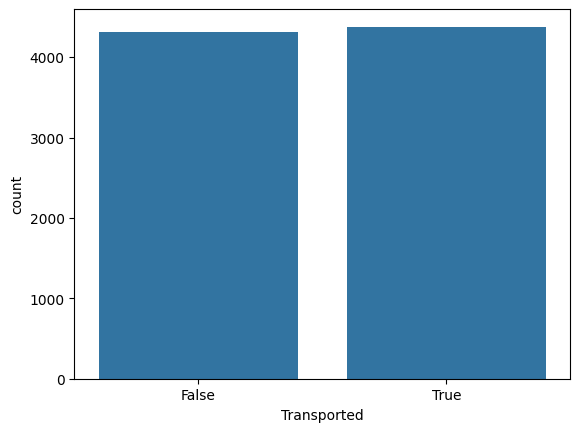

In [362]:
sns.countplot(train, x='Transported')

<Axes: >

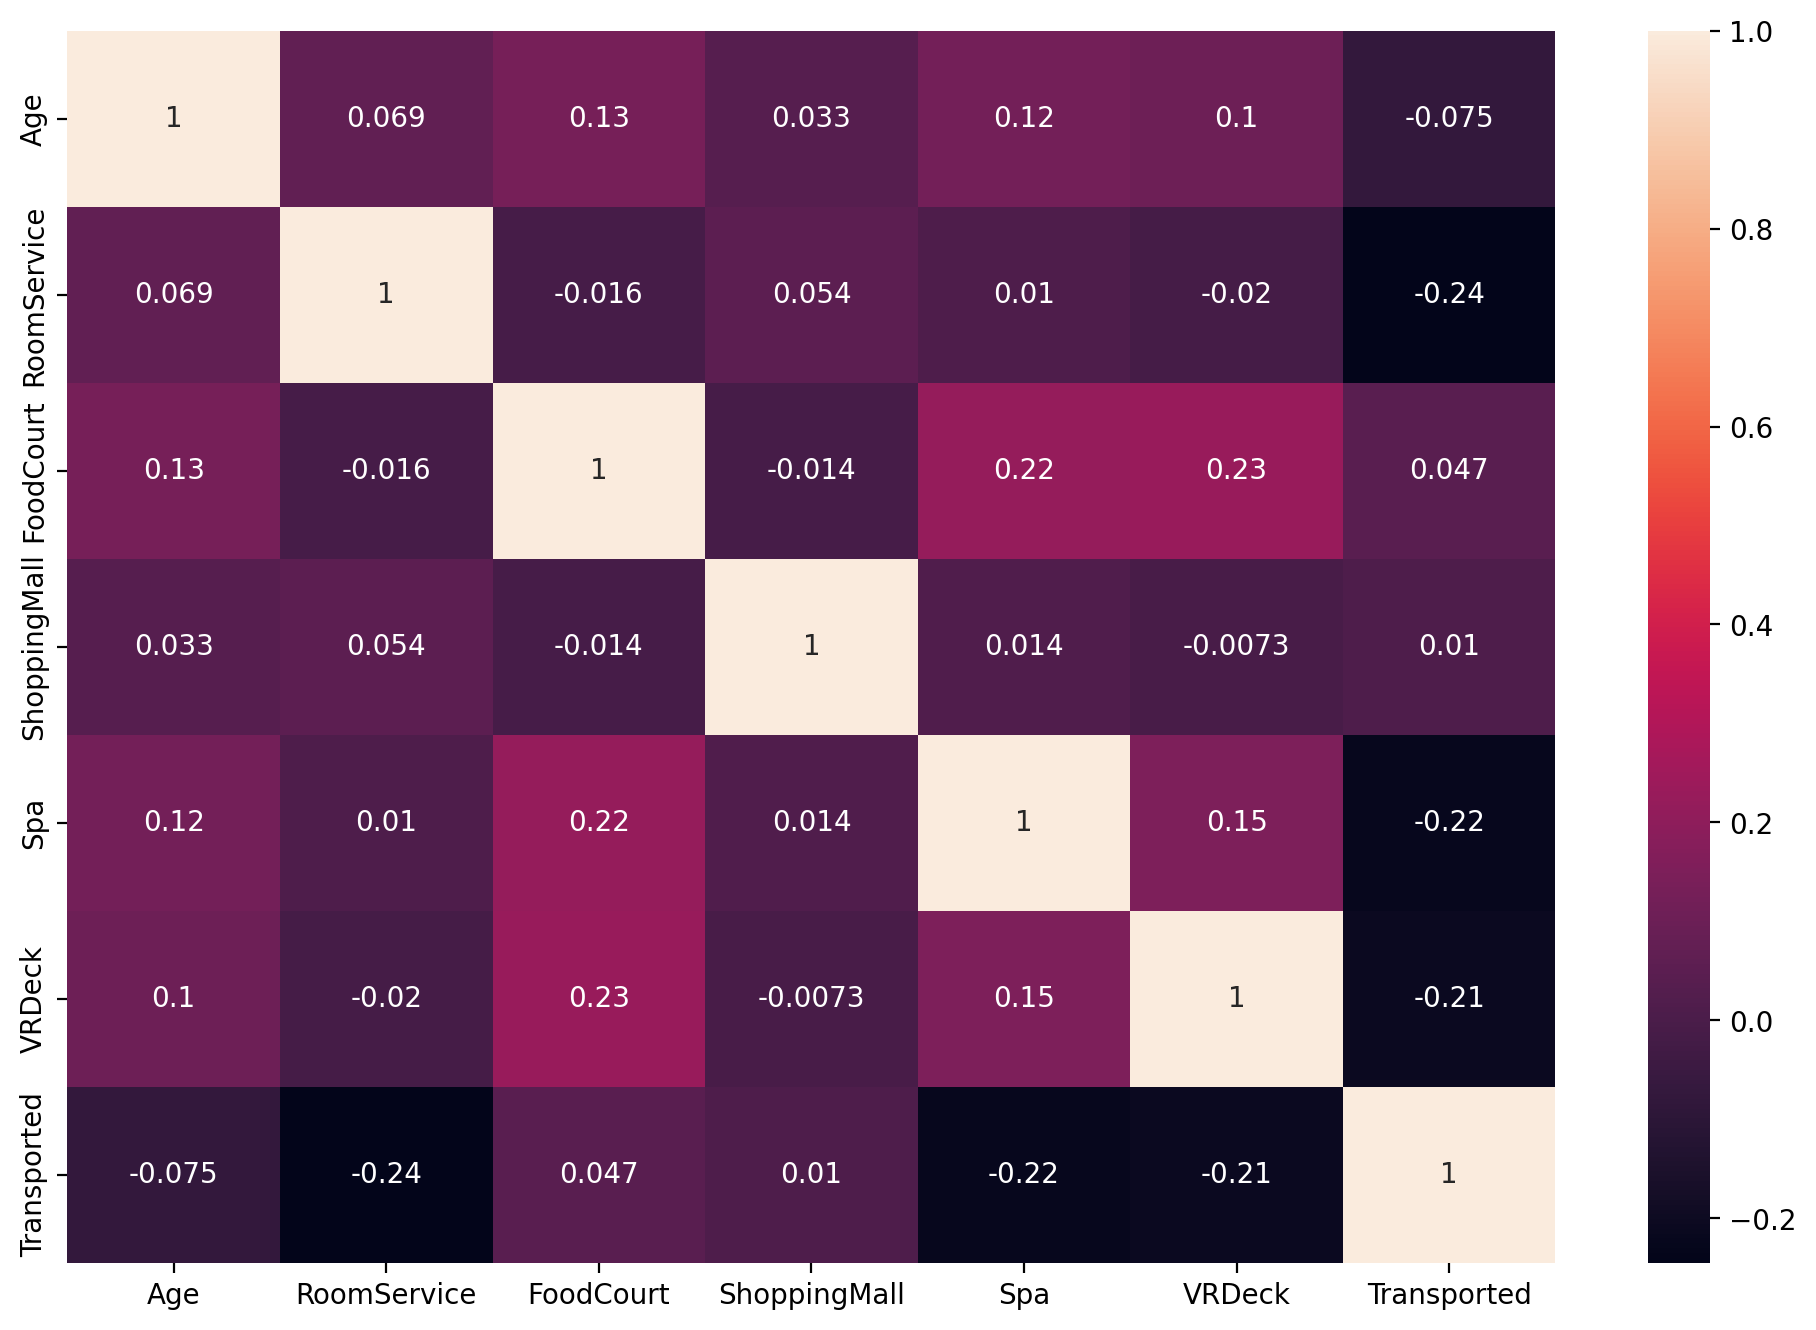

In [363]:
plt.figure(figsize=(12, 8), dpi=200)
sns.heatmap(train.corr(numeric_only=True), annot=True)

<Axes: xlabel='HomePlanet', ylabel='count'>

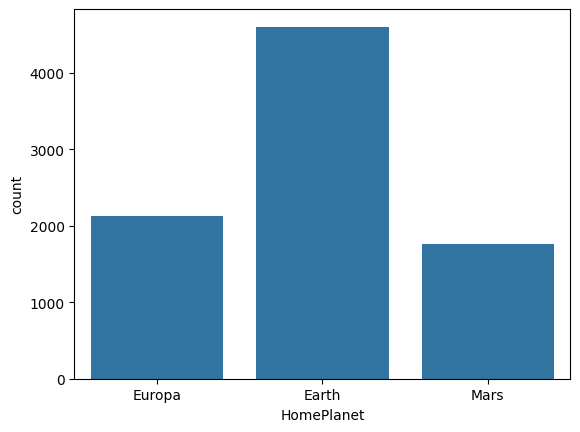

In [364]:
sns.countplot(train, x='HomePlanet')

<Axes: xlabel='CryoSleep', ylabel='count'>

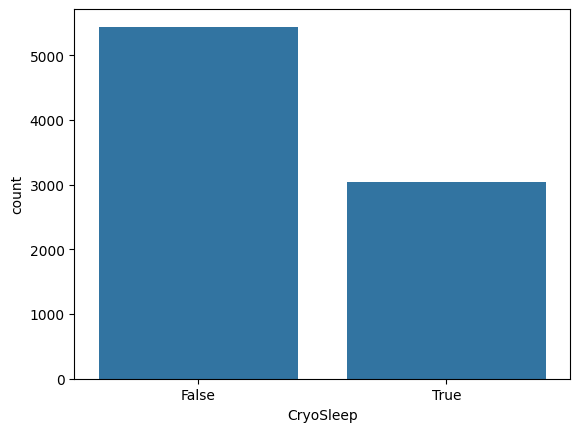

In [365]:
sns.countplot(train, x='CryoSleep')

<Axes: xlabel='Transported', ylabel='Age'>

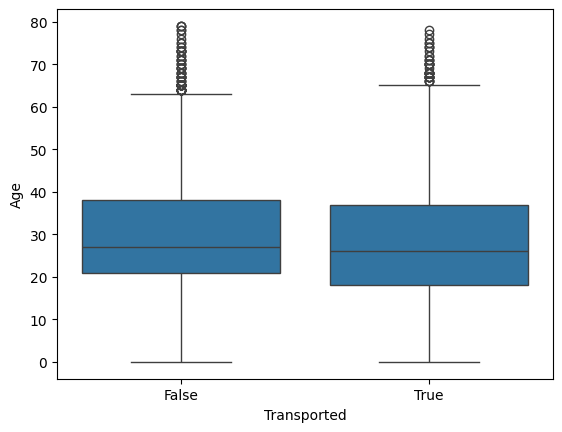

In [366]:
sns.boxplot(train, x='Transported', y='Age')

In [367]:
col = train.select_dtypes('float64').columns

In [368]:
train.groupby('VIP')[col].mean()
# Расходы VIP персон выше, чем у тех, кто не является VIP персоной

Age  RoomService    FoodCourt  ShoppingMall         Spa  \
VIP                                                                    
False  28.639611   217.218527   426.336536    173.876298  301.711045   
True   37.449495   473.615385  1811.393782    247.726804  760.710660   

            VRDeck  
VIP                 
False   282.718056  
True   1234.856410

In [369]:
train.groupby('CryoSleep')[col].mean()
# У находящихся в криосоне нет затрат на дополнительные услуги

Age  RoomService   FoodCourt  ShoppingMall        Spa  \
CryoSleep                                                                
False      29.651319   350.146772  713.004316    270.586504  486.09294   
True       27.405415     0.000000    0.000000      0.000000    0.00000   

               VRDeck  
CryoSleep              
False      475.716165  
True         0.000000

<Axes: xlabel='Age', ylabel='FoodCourt'>

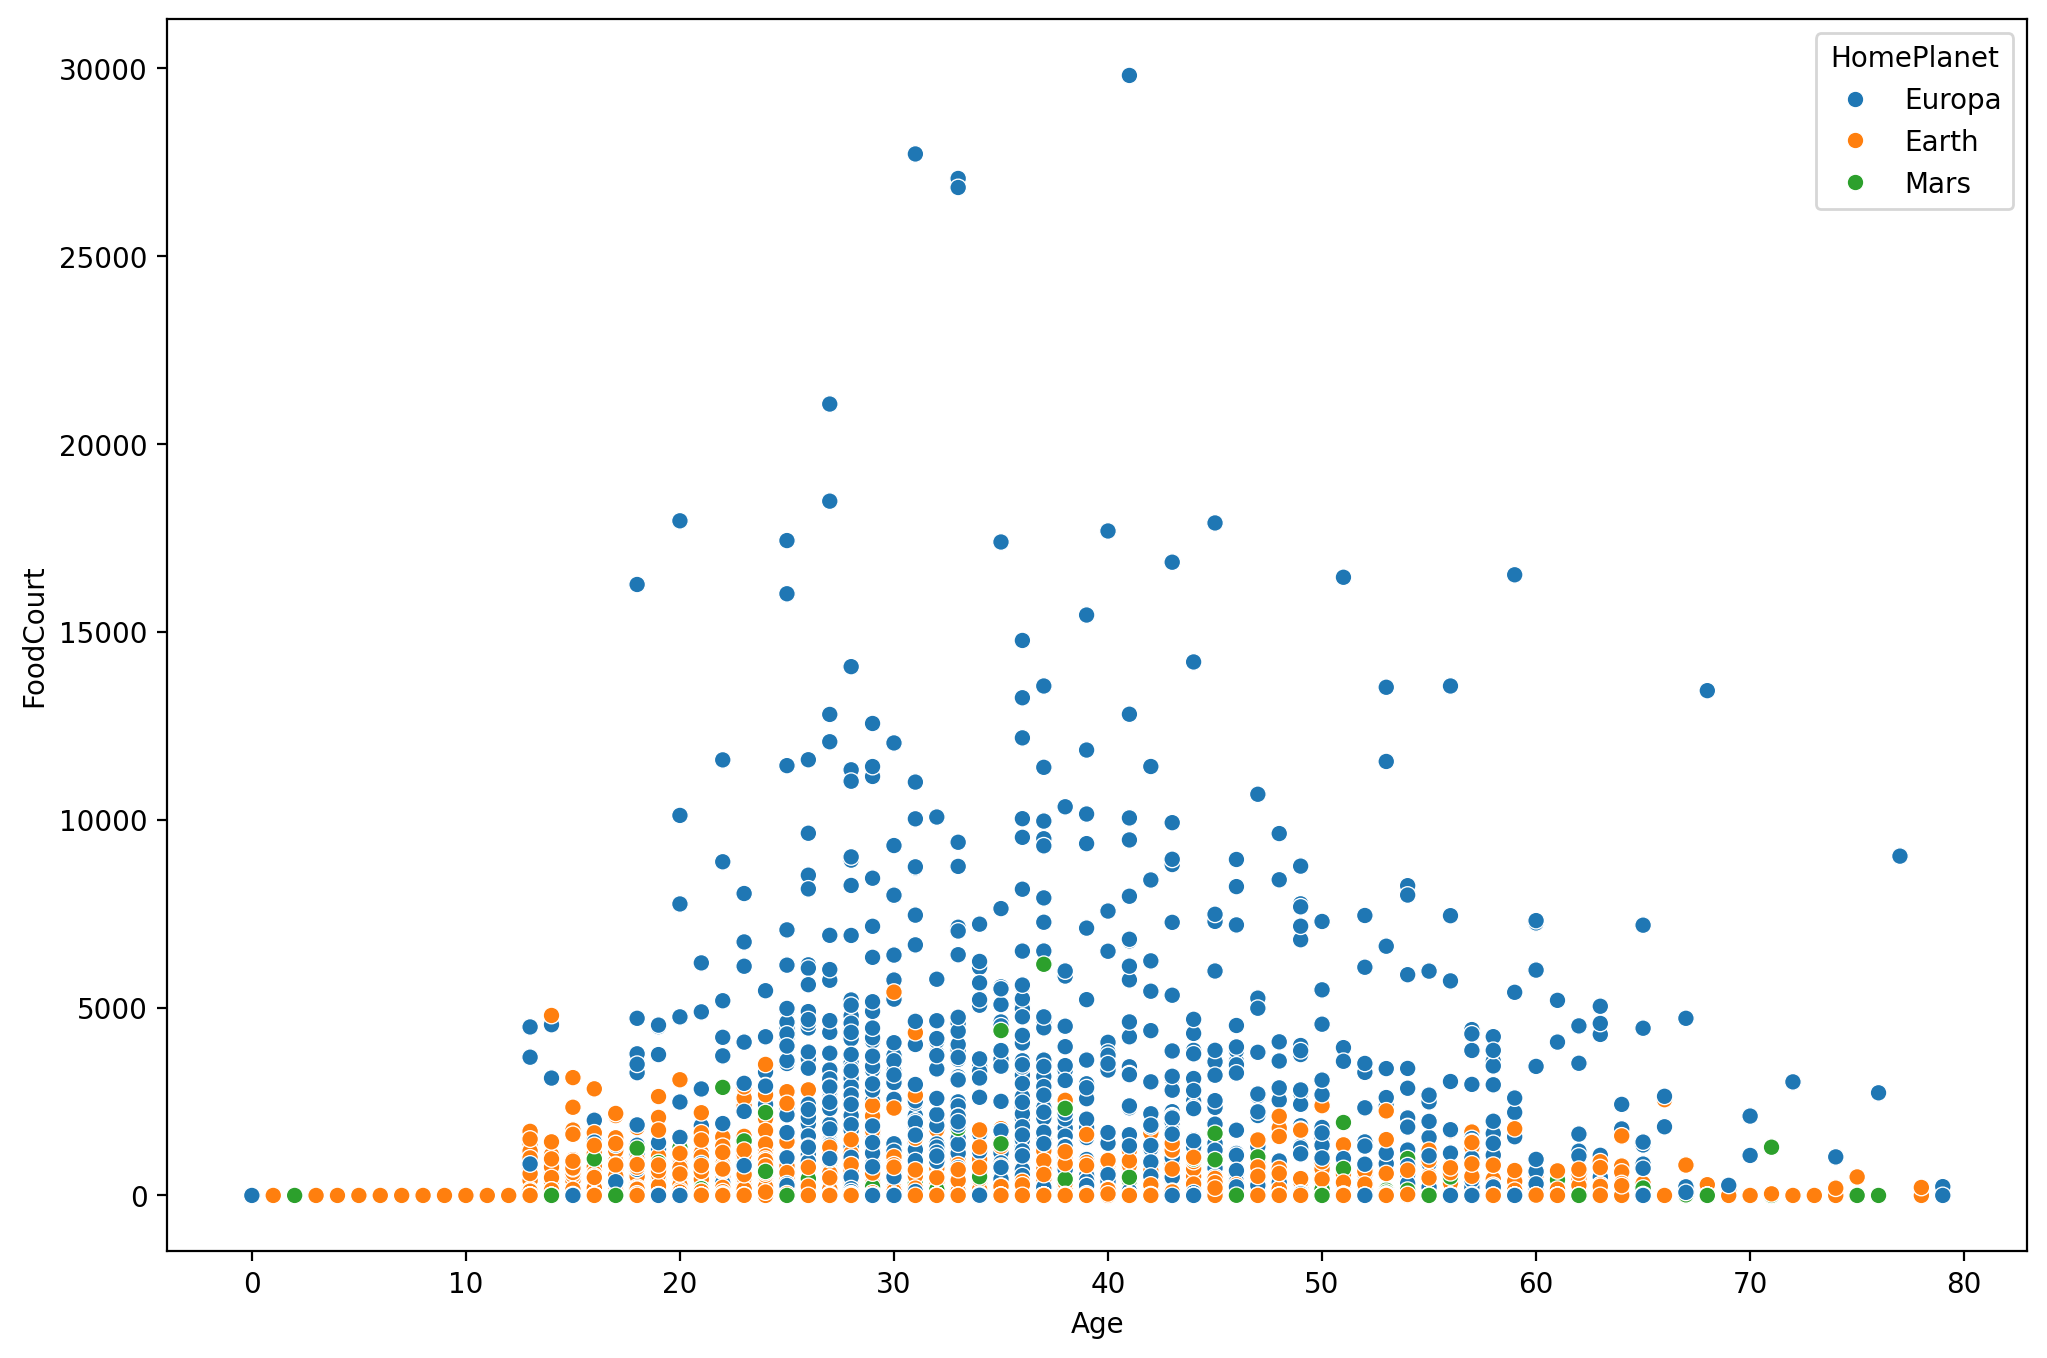

In [370]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(train, x='Age', y='FoodCourt', hue='HomePlanet')

<Axes: xlabel='Age', ylabel='FoodCourt'>

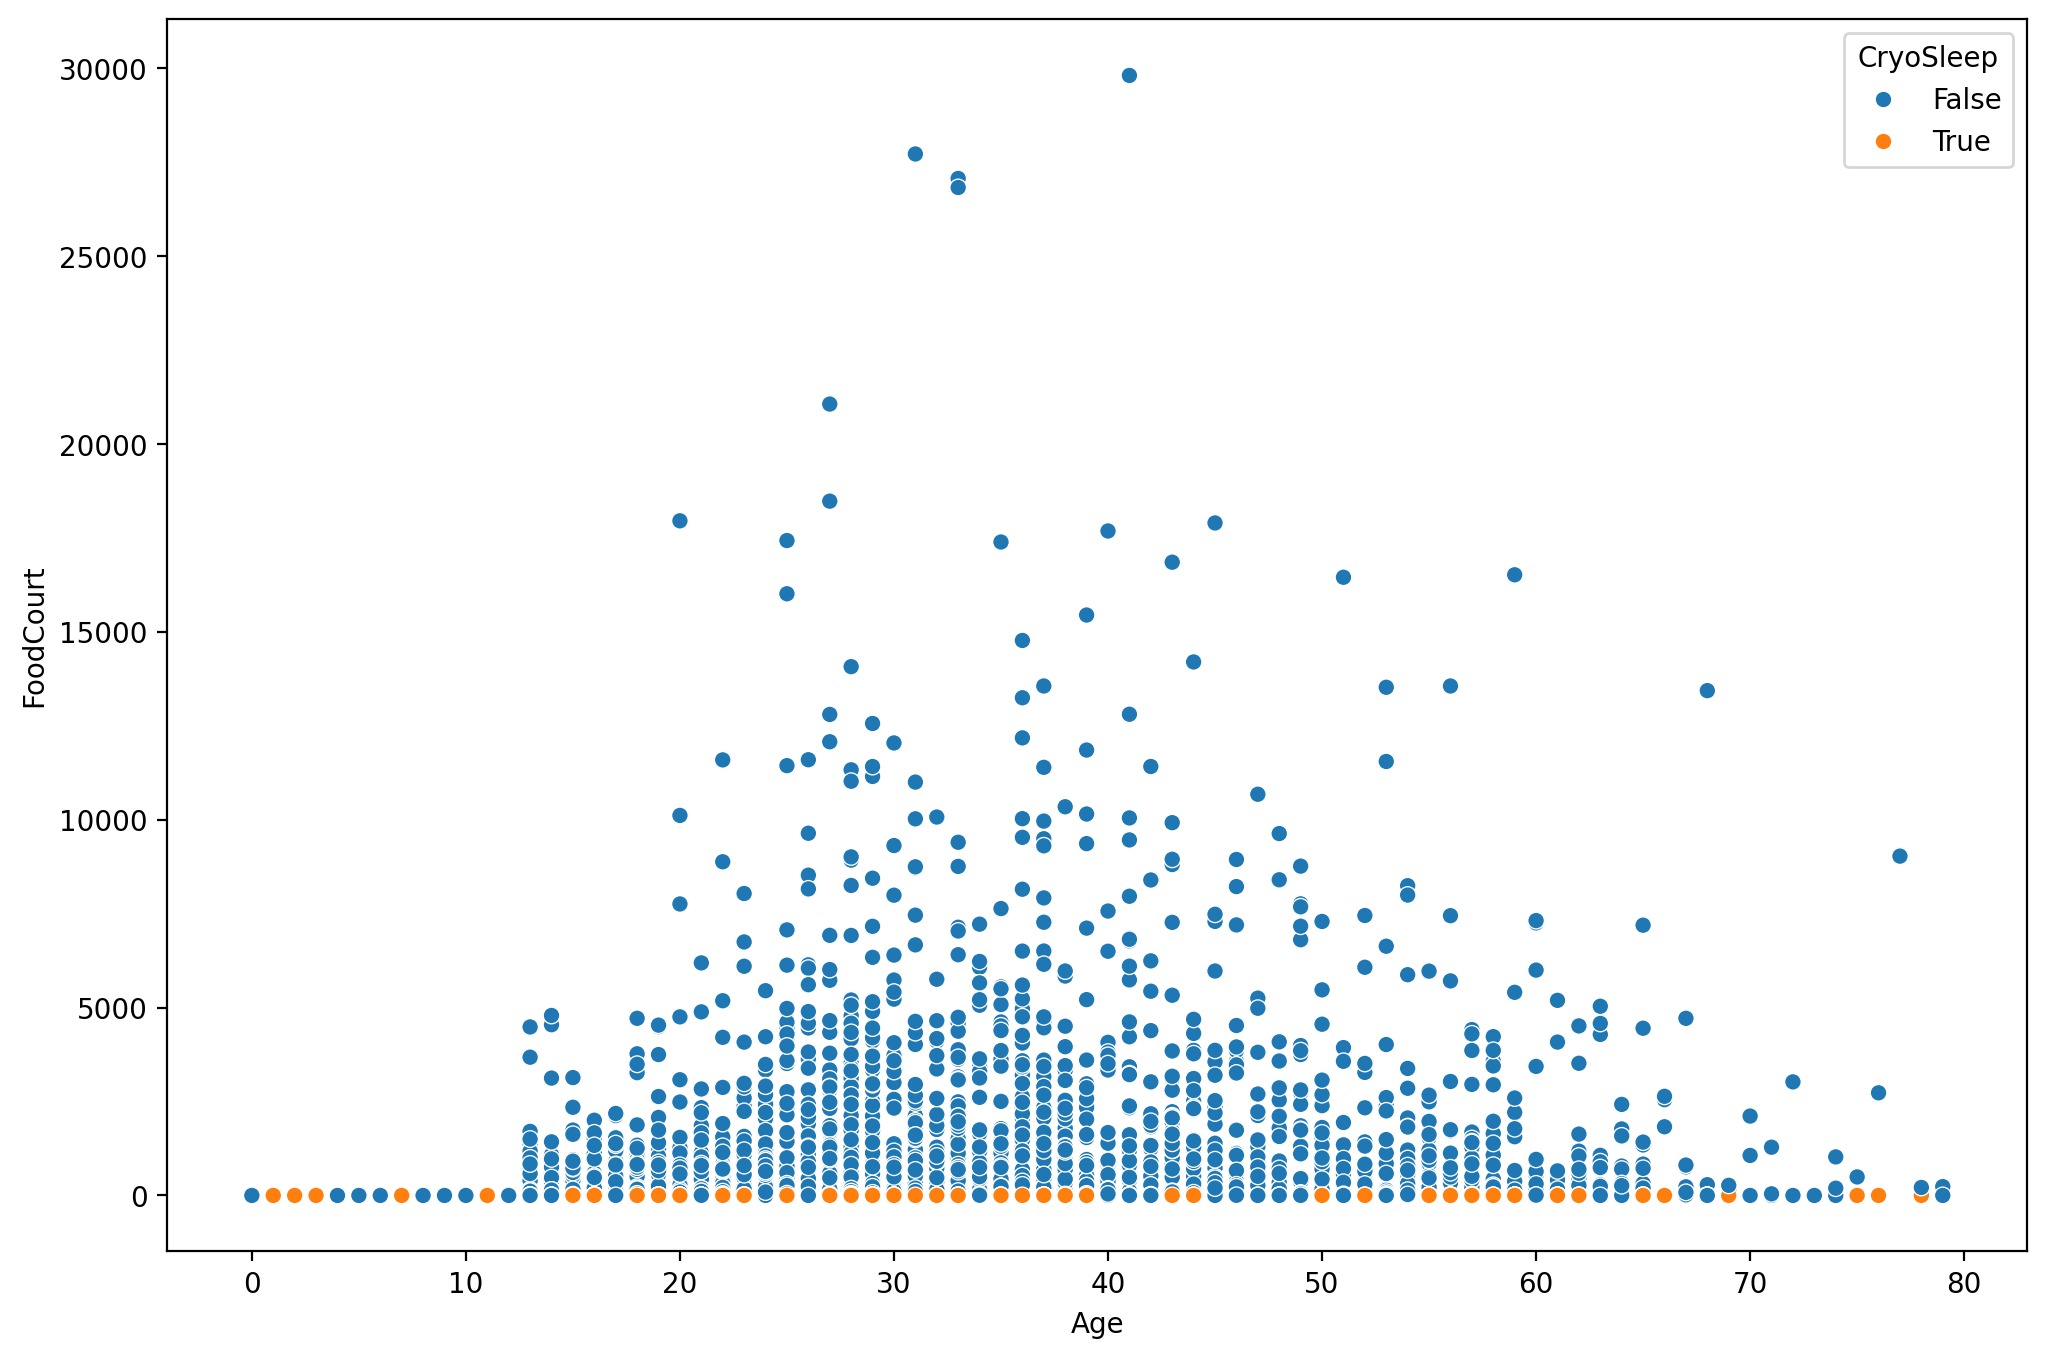

In [371]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(train, x='Age', y='FoodCourt', hue='CryoSleep')

In [372]:
train.groupby('CryoSleep')['FoodCourt'].describe()

count        mean          std  min  25%  50%    75%      max
CryoSleep                                                                
False      5329.0  713.004316  1970.547985  0.0  0.0  5.0  537.0  29813.0
True       2967.0    0.000000     0.000000  0.0  0.0  0.0    0.0      0.0

<Axes: xlabel='Transported', ylabel='Spa'>

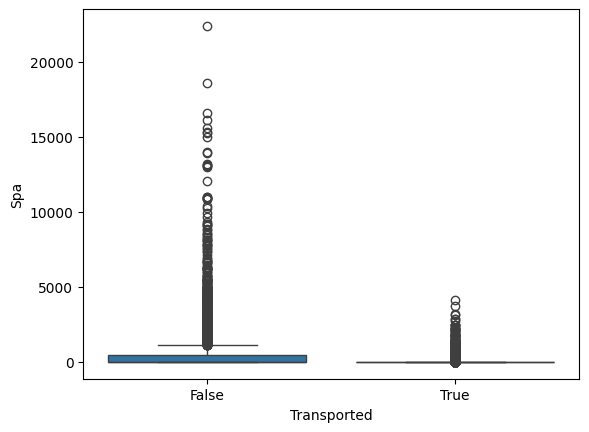

In [373]:
sns.boxplot(train, x='Transported', y='Spa')

In [374]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<Axes: xlabel='VIP', ylabel='count'>

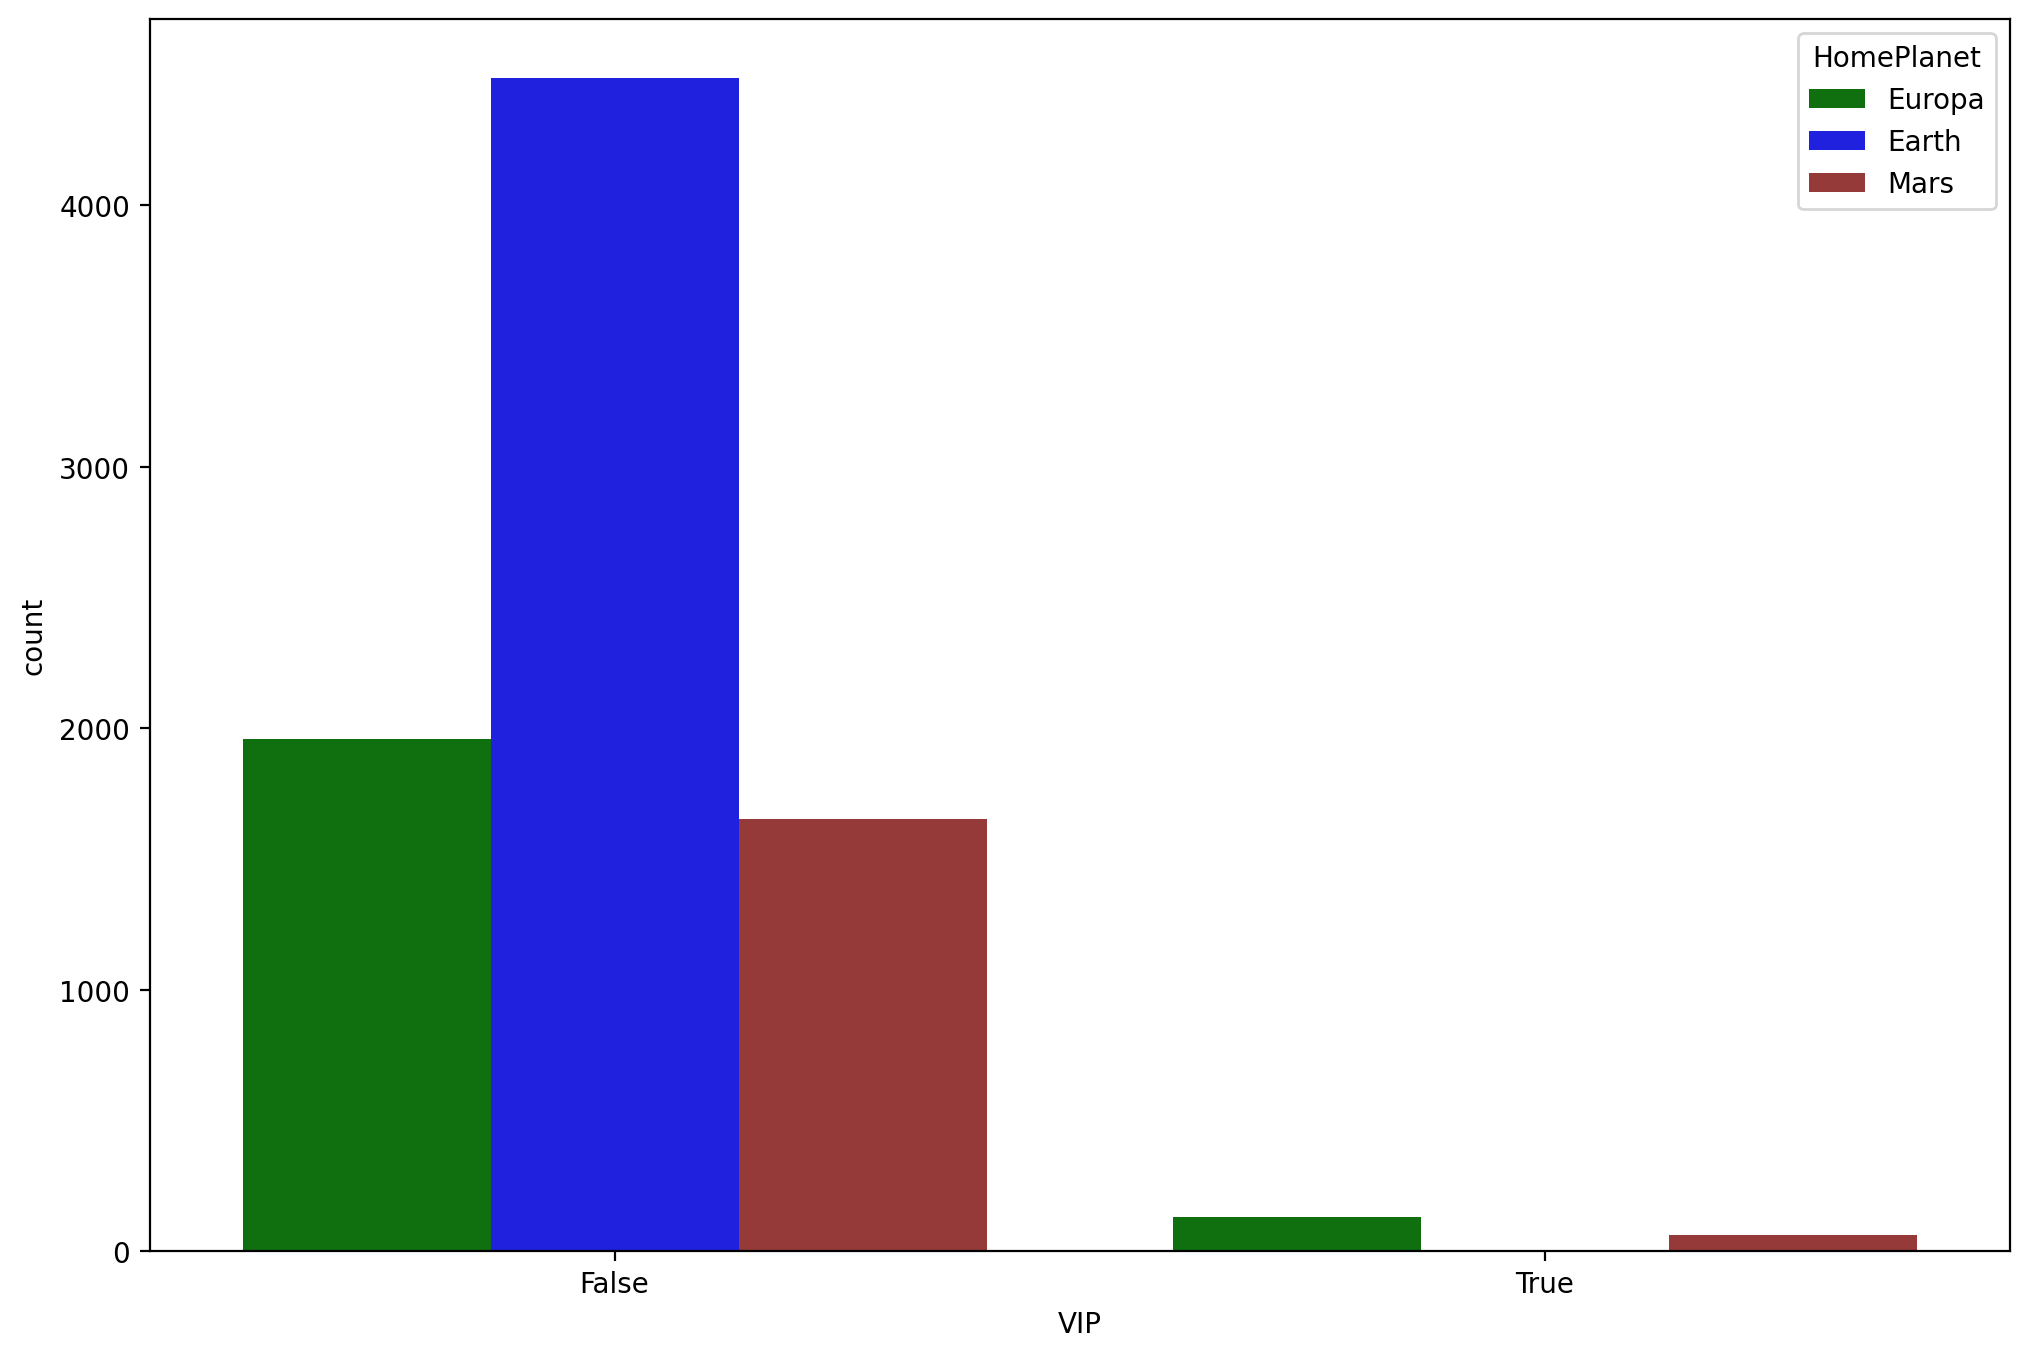

In [375]:
plt.figure(figsize=(12, 8), dpi=200)
sns.countplot(train, x='VIP', palette=['green', 'blue', 'brown'], hue='HomePlanet')

<Axes: xlabel='Transported', ylabel='RoomService'>

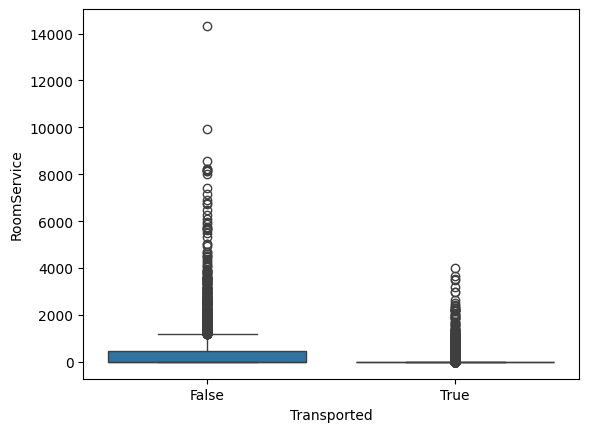

In [376]:
sns.boxplot(train, x='Transported', y='RoomService')

<Axes: xlabel='RoomService', ylabel='Density'>

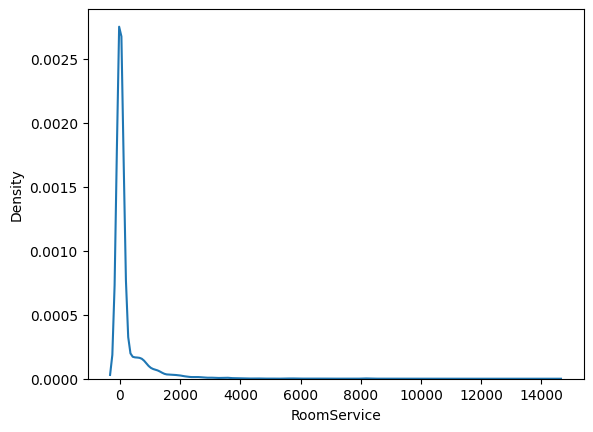

In [377]:
sns.kdeplot(train, x='RoomService')

<Axes: xlabel='Transported', ylabel='VRDeck'>

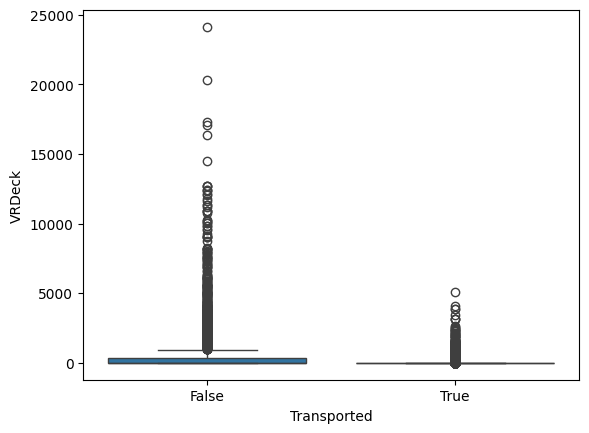

In [378]:
sns.boxplot(train, x='Transported', y='VRDeck')

C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\1001389049.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(train, x='HomePlanet', y='Age', palette=['green', 'blue', 'brown'])


<Axes: xlabel='HomePlanet', ylabel='Age'>

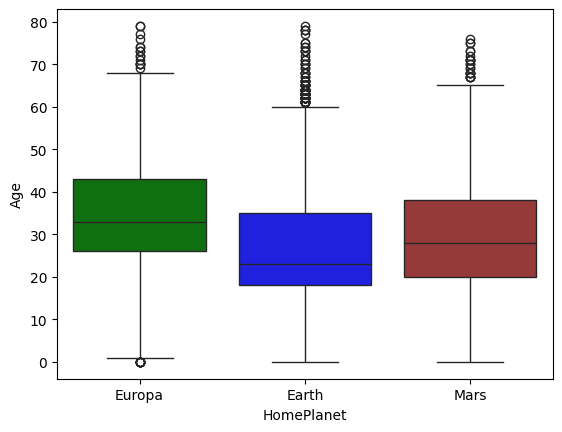

In [379]:
sns.boxplot(train, x='HomePlanet', y='Age', palette=['green', 'blue', 'brown'])

<Axes: xlabel='HomePlanet', ylabel='Age'>

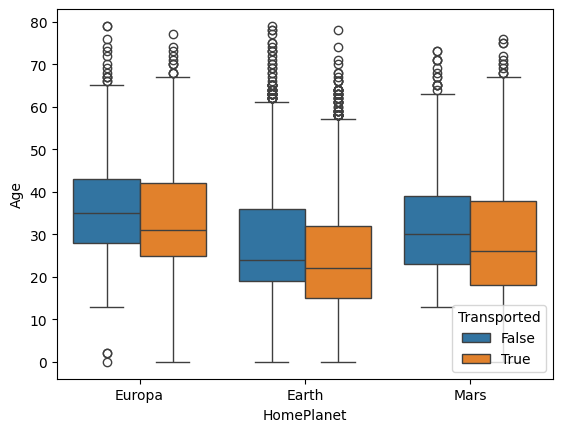

In [380]:
sns.boxplot(train, x='HomePlanet', y='Age', hue='Transported')

In [381]:
train.groupby('HomePlanet')['Age'].mean()

HomePlanet
Earth     26.068232
Europa    34.419664
Mars      29.297203
Name: Age, dtype: float64

## Data Cleaning <a class='anchor' id='data-cleaning'>

In [382]:
train.loc[(train['Spa'] > 20000), 'Spa'] = train['Spa'].mean()

In [383]:
conc_df = pd.concat([train.iloc[:, :-1], test], axis=0).reset_index(drop=True)

In [384]:
conc_df.isna().sum()

PassengerId       0
HomePlanet      288
CryoSleep       310
Cabin           299
Destination     274
Age             270
VIP             296
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Name            294
dtype: int64

In [385]:
def clean_columns(df):
    df.drop(columns=['Name'], inplace=True)

In [414]:
def fill_nan(df):   
    df['VIP'].fillna(df['VIP'].mode()[0], inplace=True)
    
    col = df.select_dtypes('float64').columns[1:]
    df.loc[df['CryoSleep'] == True, col] = 0
    
    vip_false = df['VIP'] == False
    df.loc[vip_false, 'HomePlanet'] = df.loc[vip_false, 'HomePlanet'].fillna('Earth')
    
    vip_true = df['VIP'] == True
    df.loc[vip_true, 'HomePlanet'] = df.loc[vip_true, 'HomePlanet'].fillna('Europa')
    
    df['Age'] = df['Age'].fillna(df.groupby('VIP')['Age'].transform('mean'))
    
    cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    for col in cols:
        df[col] = df[col].fillna(df.groupby('VIP')[col].transform('mean'))
    
    cols_nulls = df.isna().sum().index
    
    for col in cols_nulls:
        if df[col].isna().sum() == 0:
            continue
        elif df[col].dtype in (object, bool):
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)

In [387]:
clean_columns(conc_df)
fill_nan(conc_df)

In [388]:
conc_df.isna().sum().sum()

0

## Feature Engineering <a class='anchor' id='feat-eng'>

In [389]:
conc_df.head()

PassengerId HomePlanet  CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa      False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth      False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa      False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa      False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth      False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  
0          0.0        0.0           0.0     0.0     0.0  
1        109.0        9.0          25.0   549.0    44.0  
2         43.0     3576.0           0.0  6715.0    49.0  
3          0.0     1283.0         371.0  3329.0   193.0  
4        303.0       70.0         151.0   565.0     2.0

In [390]:
conc_df['Cabin'].str.split('/', n=2, expand=True)

0     1  2
0      B     0  P
1      F     0  S
2      A     0  S
3      A     0  S
4      F     1  S
...   ..   ... ..
12965  G  1496  S
12966  G   160  P
12967  D   296  P
12968  D   297  P
12969  G  1498  S

[12970 rows x 3 columns]

In [391]:
def cabin_feature(df):
    cabin = df['Cabin'].str.split('/', n=2, expand=True)
    df['F1'] = cabin[0]
    df['F2'] = cabin[1].astype(int)
    df['F3'] = cabin[2]
    
    df.drop(['Cabin'], axis=1, inplace=True)

In [392]:
def passenger_feature(df):
    passenger = df['PassengerId'].str.split("_", n=1, expand=True)
    df['RoomNo'] = passenger[0].astype(int)
    df['PassengerNo'] = passenger[1].astype(int)
    df.drop(['PassengerId'], inplace=True, axis=1)
    data = df['RoomNo']
    for i in range(df.shape[0]):
        temp = data == data[i]
        df['PassengerNo'][i] = (temp).sum()
    df.drop(['RoomNo'], axis=1, inplace=True)

In [393]:
def new_column(df):
    df['TotalLuxury'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']

In [394]:
cabin_feature(conc_df)
passenger_feature(conc_df)
new_column(conc_df)

C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp

C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp

C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp

C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp

C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp

C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp

C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp

C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp

C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp

C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp

C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp

C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp

C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp

C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp

C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp

C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp

C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp

C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp

C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp

C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp

C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp

C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp

C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp

C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp

C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp).sum()
C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\3463385065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PassengerNo'][i] = (temp

<Axes: xlabel='PassengerNo', ylabel='count'>

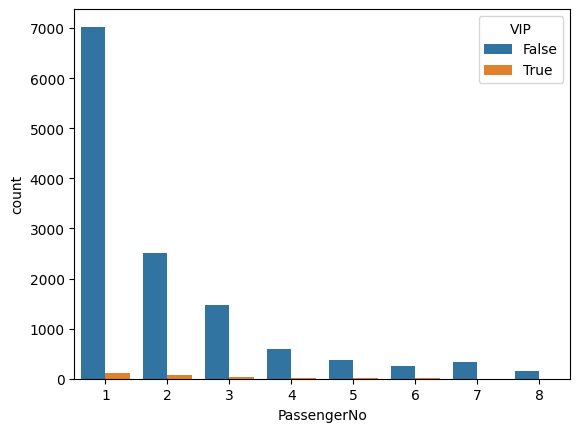

In [395]:
sns.countplot(conc_df, x='PassengerNo', hue='VIP')

In [396]:
conc_df.head()

HomePlanet  CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  \
0     Europa      False  TRAPPIST-1e  39.0  False          0.0        0.0   
1      Earth      False  TRAPPIST-1e  24.0  False        109.0        9.0   
2     Europa      False  TRAPPIST-1e  58.0   True         43.0     3576.0   
3     Europa      False  TRAPPIST-1e  33.0  False          0.0     1283.0   
4      Earth      False  TRAPPIST-1e  16.0  False        303.0       70.0   

   ShoppingMall     Spa  VRDeck F1  F2 F3  PassengerNo  TotalLuxury  
0           0.0     0.0     0.0  B   0  P            1          0.0  
1          25.0   549.0    44.0  F   0  S            1        736.0  
2           0.0  6715.0    49.0  A   0  S            2      10383.0  
3         371.0  3329.0   193.0  A   0  S            2       5176.0  
4         151.0   565.0     2.0  F   1  S            1       1091.0

In [397]:
conc_df.isna().sum().sum()

0

## Data Preprocessing (Предварительная обработка данных)<a class="anchor" id="data-prepr"></a>

In [398]:
dummies = pd.get_dummies(conc_df, drop_first=True)

In [399]:
train = dummies.iloc[:rows_train, :]
test = dummies.iloc[rows_train:, :]

In [400]:
test.reset_index(drop=True, inplace=True)

In [401]:
test.head()

CryoSleep   Age    VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
0       True  27.0  False          0.0        0.0           0.0     0.0   
1      False  19.0  False          0.0        9.0           0.0  2823.0   
2       True  31.0  False          0.0        0.0           0.0     0.0   
3      False  38.0  False          0.0     6652.0           0.0   181.0   
4      False  20.0  False         10.0        0.0         635.0     0.0   

   VRDeck  F2  PassengerNo  ...  Destination_PSO J318.5-22  \
0     0.0   3            1  ...                      False   
1     0.0   4            1  ...                      False   
2     0.0   0            1  ...                      False   
3   585.0   1            1  ...                      False   
4     0.0   5            1  ...                      False   

   Destination_TRAPPIST-1e   F1_B   F1_C   F1_D   F1_E   F1_F   F1_G   F1_T  \
0                     True  False  False  False  False  False   True  False   
1                     True  False  False  False  False   True  False  False   
2                    False  False   True  False  False  False  False  False   
3                     True  False   True  False  False  False  False  False   
4                     True  False  False  False  False   True  False  False   

   F3_S  
0  True  
1  True  
2  True  
3  True  
4  True  

[5 rows x 23 columns]

In [402]:
train = pd.concat([train, target], axis=1)

In [403]:
X = train.drop(columns='Transported')
y = train['Transported']

In [404]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model Building (Построение модели)<a class="anchor" id="model-build"></a>

In [405]:
## Общая функция для вывода метрики
def get_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_pred, y_test))  

## RandomForest

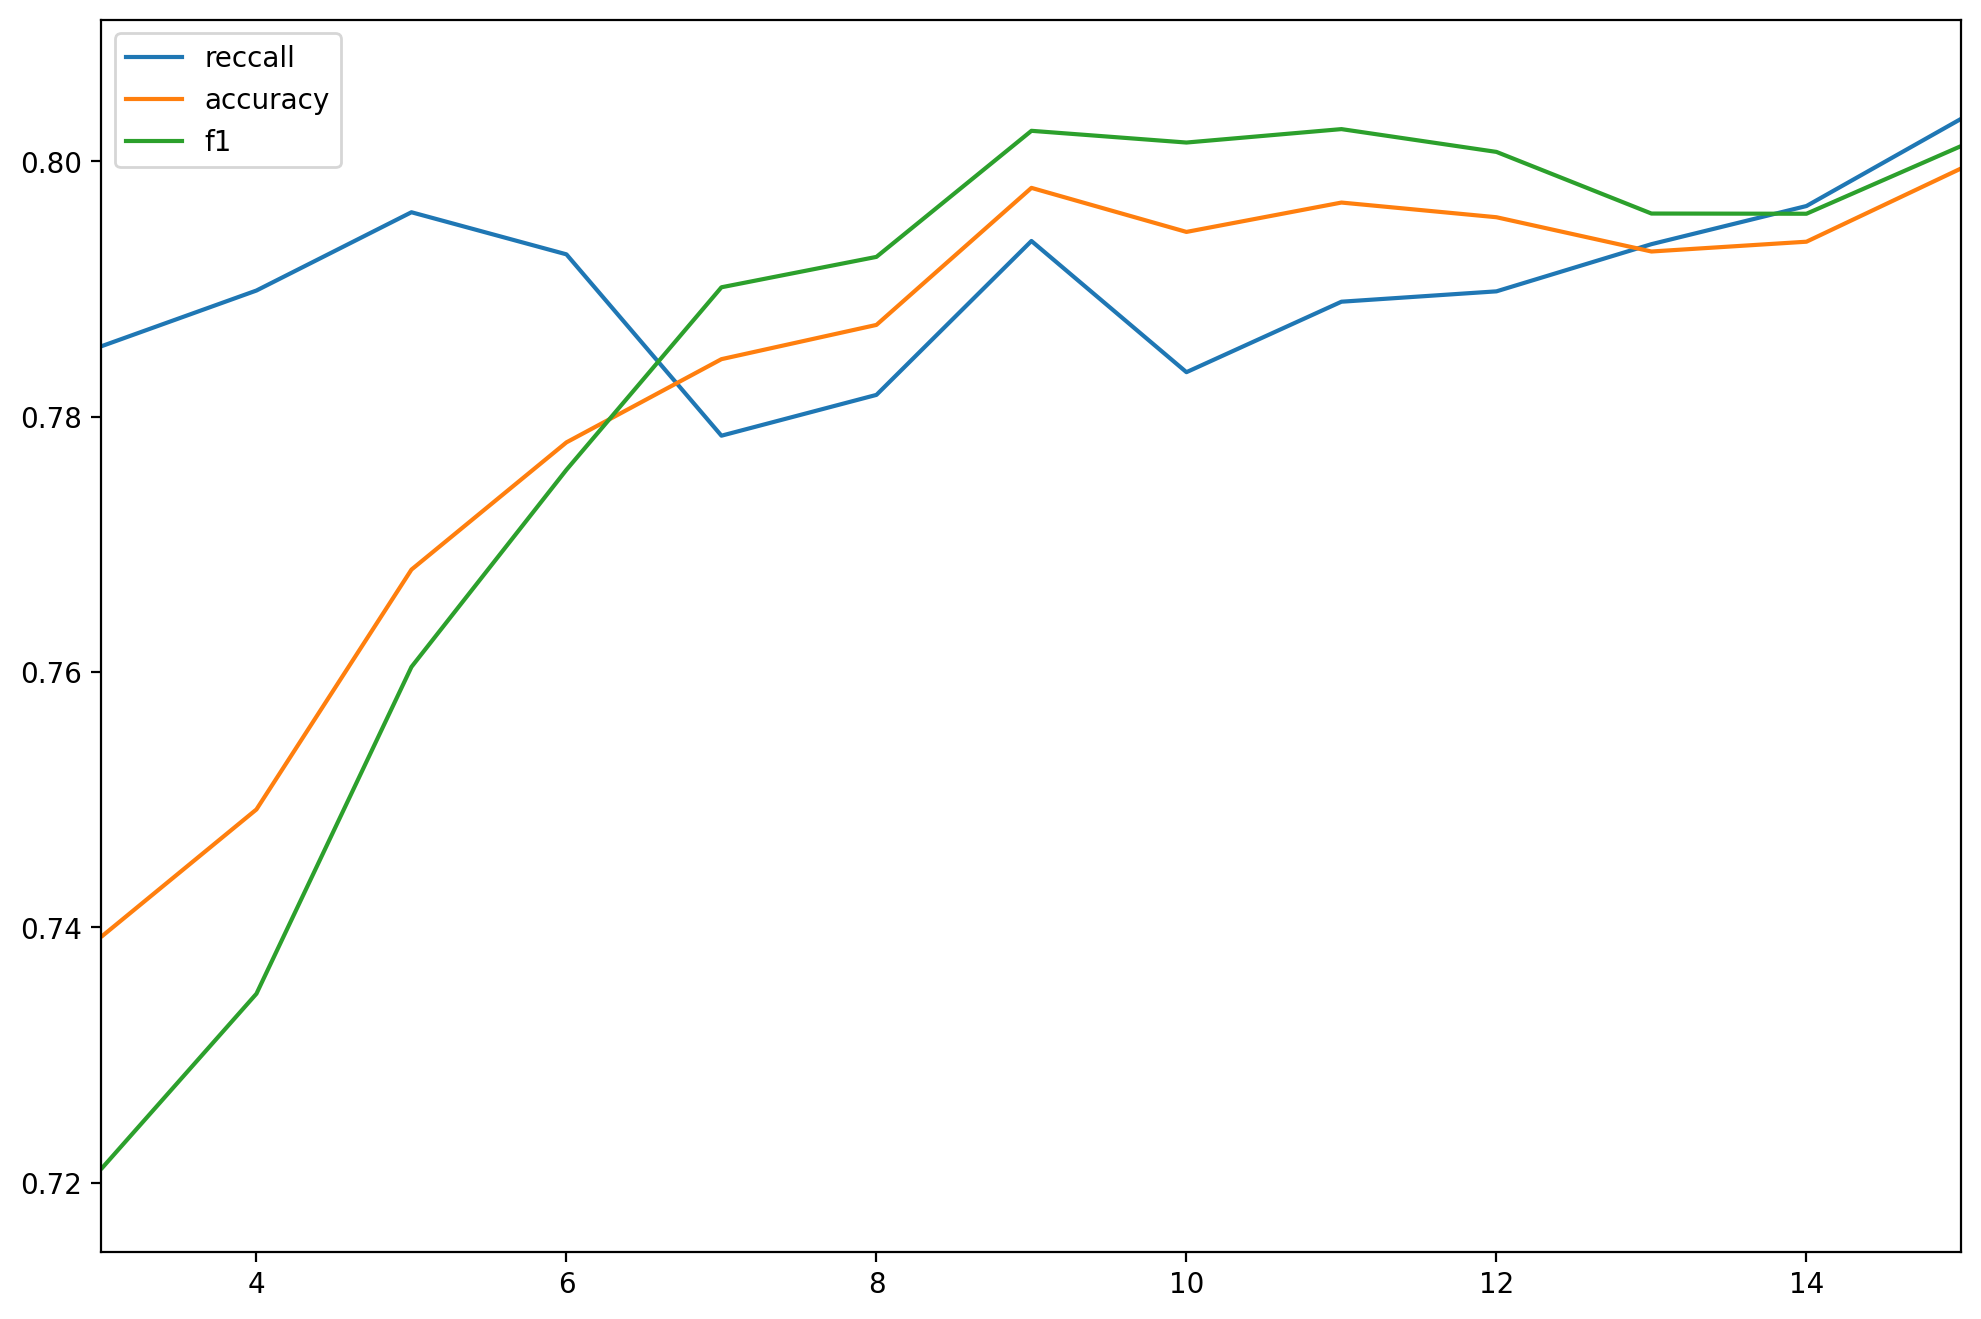

In [105]:
## Выбор гиперпараметра max_depth
recc = []
acc = []
f1 = []
depths = range(1, 20)
for depth in depths:
    rfc = make_pipeline(RobustScaler(), RandomForestClassifier(max_depth=depth))
    rfc.fit(X_train, y_train)
    pred = rfc.predict(X_test)
    recc.append(recall_score(pred, y_test))
    acc.append(accuracy_score(pred, y_test))
    f1.append(f1_score(pred, y_test))
fig, ax = plt.subplots(figsize=(12, 8), dpi=200)
ax.plot(depths, recc, label='reccall')
ax.plot(depths, acc, label='accuracy')
ax.plot(depths, f1, label='f1')
ax.legend()
plt.xlim(3, 15)
plt.xticks();

In [106]:
## Выбор гиперпараметра min_samples_split
recc = []
acc = []
f1 = []
samples = range(2, 100)
for sample in samples:
    rfc = make_pipeline(RobustScaler(), RandomForestClassifier(n_estimators=100,
                                                               min_samples_split=sample,
                                                               max_depth=13))
    rfc.fit(X_train, y_train)
    pred = rfc.predict(X_test)
    recc.append(recall_score(pred, y_test))
    acc.append(accuracy_score(pred, y_test))
    f1.append(f1_score(pred, y_test))
fig, ax = plt.subplots(figsize=(12, 8), dpi=200)
ax.plot(samples, recc, label='reccall')
ax.plot(samples, acc, label='accuracy')
ax.plot(samples, f1, label='f1')
plt.xlim(40, 60)
ax.legend();


KeyboardInterrupt



In [ ]:
## Выбор гиперпараметра min_samples_leaf
recc = []
acc = []
f1 = []
samples = range(2, 100)
for sample in samples:
    rfc = make_pipeline(RobustScaler(), RandomForestClassifier(n_estimators=100,
                                 min_samples_leaf=sample,
                                 max_depth=13,
                                 min_samples_split=51))
    rfc.fit(X_train, y_train)
    pred = rfc.predict(X_test)
    recc.append(recall_score(pred, y_test))
    acc.append(accuracy_score(pred, y_test))
    f1.append(f1_score(pred, y_test))
fig, ax = plt.subplots(figsize=(12, 8), dpi=200)
ax.plot(samples, recc, label='reccall')
ax.plot(samples, acc, label='accuracy')
ax.plot(samples, f1, label='f1')
ax.legend()
plt.xlim(0, 20)
plt.xticks(range(0, 20));

In [ ]:
## Выбор гиперпараметра max_leaf_nodes
recc = []
acc = []
f1 = []
samples = range(2, 100)
for sample in samples:
    rfc = make_pipeline(RobustScaler(), RandomForestClassifier(n_estimators=100,
                                 min_samples_leaf=5,
                                 max_depth=13,
                                 min_samples_split=51,
                                 max_leaf_nodes=sample))
    rfc.fit(X_train, y_train)
    pred = rfc.predict(X_test)
    recc.append(recall_score(pred, y_test))
    acc.append(accuracy_score(pred, y_test))
    f1.append(f1_score(pred, y_test))
fig, ax = plt.subplots(figsize=(12, 8), dpi=200)
ax.plot(samples, recc, label='reccall')
ax.plot(samples, acc, label='accuracy')
ax.plot(samples, f1, label='f1')
ax.legend()
plt.xlim(80, 100)
plt.xticks(range(80, 101));

In [ ]:
## Выбор гиперпараметра n_estimators
recc = []
acc = []
f1 = []
estimators = [100, 200, 300, 500, 1000]
for n in estimators:
    rfc = make_pipeline(RobustScaler(), RandomForestClassifier(n_estimators=n,
                                 min_samples_leaf=5,
                                 max_depth=13,
                                 min_samples_split=51,
                                 max_leaf_nodes=88))
    rfc.fit(X_train, y_train)
    pred = rfc.predict(X_test)
    recc.append(recall_score(pred, y_test))
    acc.append(accuracy_score(pred, y_test))
    f1.append(f1_score(pred, y_test))
fig, ax = plt.subplots(figsize=(12, 8), dpi=200)
ax.plot(estimators, recc, label='reccall')
ax.plot(estimators, acc, label='accuracy')
ax.plot(estimators, f1, label='f1')
ax.legend()
plt.xlim(200, 600)
plt.xticks(range(200, 600, 5), rotation=90);

In [ ]:
## Выбор гиперпараметра max_features
recc = []
acc = []
f1 = []
features = ['sqrt', 'log2', None]
for feature in features:
    rfc = make_pipeline(RobustScaler(), RandomForestClassifier(n_estimators=200,
                                 min_samples_leaf=5,
                                 max_depth=13,
                                 min_samples_split=51,
                                 max_leaf_nodes=88,
                                 max_features=feature))
    rfc.fit(X_train, y_train)
    pred = rfc.predict(X_test)
    recc.append(recall_score(pred, y_test))
    acc.append(accuracy_score(pred, y_test))
    f1.append(f1_score(pred, y_test))
fig, ax = plt.subplots(figsize=(12, 8), dpi=200)
ax.plot(['sqrt', 'log2', 'None'], recc, label='reccall')
ax.plot(['sqrt', 'log2', 'None'], acc, label='accuracy')
ax.plot(['sqrt', 'log2', 'None'], f1, label='f1')
ax.legend()

In [ ]:
## Выбор гиперпараметра max_samples
recc = []
acc = []
f1 = []
samples = [0.1, 0.3, 0.5, 0.7, 0.9, 1]
for sample in samples:
    rfc = make_pipeline(RobustScaler(), RandomForestClassifier(n_estimators=200,
                                 min_samples_leaf=5,
                                 max_depth=13,
                                 min_samples_split=51,
                                 max_leaf_nodes=88,
                                 max_features='log2',
                                 max_samples=sample))
    rfc.fit(X_train, y_train)
    pred = rfc.predict(X_test)
    recc.append(recall_score(pred, y_test))
    acc.append(accuracy_score(pred, y_test))
    f1.append(f1_score(pred, y_test))
fig, ax = plt.subplots(figsize=(12, 8), dpi=200)
ax.plot(samples, recc, label='reccall')
ax.plot(samples, acc, label='accuracy')
ax.plot(samples, f1, label='f1')
ax.legend()

In [ ]:
## Выбор гиперпараметра criterion
recc = []
acc = []
f1 = []
criterions = ['gini', 'entropy', 'log_loss']
for criterion in criterions:
    rfc = make_pipeline(RobustScaler(), RandomForestClassifier(n_estimators=200,
                                 min_samples_leaf=5,
                                 max_depth=13,
                                 min_samples_split=51,
                                 max_leaf_nodes=88,
                                 max_features='log2',
                                 max_samples=0.4,
                                 criterion=criterion))
    rfc.fit(X_train, y_train)
    pred = rfc.predict(X_test)
    recc.append(recall_score(pred, y_test))
    acc.append(accuracy_score(pred, y_test))
    f1.append(f1_score(pred, y_test))
fig, ax = plt.subplots(figsize=(12, 8), dpi=200)
ax.plot(criterions, recc, label='reccall')
ax.plot(criterions, acc, label='accuracy')
ax.plot(criterions, f1, label='f1')
ax.legend()

In [ ]:
def result_rfc_model(X_train, y_train):
    pipe_rfc = make_pipeline(RobustScaler(), RandomForestClassifier(n_estimators=200,                                 min_samples_leaf=5,
                                 max_depth=13,
                                 min_samples_split=51,
                                 max_leaf_nodes=88,
                                 max_features='log2',
                                 max_samples=0.4,
                                 criterion='entropy'))
    pipe_rfc.fit(X_train, y_train)
    return pipe_rfc

In [ ]:
pipe_rfc = result_rfc_model(X_train, y_train)

In [ ]:
get_metrics(pipe_rfc, X_test, y_test)

## XGBoostClassifier

In [406]:
param_grid = {'max_depth': [3,6,10],
              'learning_rate': [0.01, 0.05, 0.1],
              'n_estimators': [100, 500, 1000],
              'colsample_bytree': [0.3, 0.7]}

pipe_xgboosst = make_pipeline(StandardScaler(), GridSearchCV(XGBClassifier(),
                                                            param_grid=param_grid,
                                                            verbose=2))

In [407]:
pipe_xgboosst.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.1s
[CV] END colsample_bytree=0.3

[CV] END colsample_bytree=0.3, learning_rate=0.05, max_depth=10, n_estimators=500; total time=   0.5s
[CV] END colsample_bytree=0.3, learning_rate=0.05, max_depth=10, n_estimators=500; total time=   0.6s
[CV] END colsample_bytree=0.3, learning_rate=0.05, max_depth=10, n_estimators=500; total time=   0.6s
[CV] END colsample_bytree=0.3, learning_rate=0.05, max_depth=10, n_estimators=500; total time=   0.6s
[CV] END colsample_bytree=0.3, learning_rate=0.05, max_depth=10, n_estimators=1000; total time=   1.0s
[CV] END colsample_bytree=0.3, learning_rate=0.05, max_depth=10, n_estimators=1000; total time=   1.0s
[CV] END colsample_bytree=0.3, learning_rate=0.05, max_depth=10, n_estimators=1000; total time=   1.0s
[CV] END colsample_bytree=0.3, learning_rate=0.05, max_depth=10, n_estimators=1000; total time=   1.0s
[CV] END colsample_bytree=0.3, learning_rate=0.05, max_depth=10, n_estimators=1000; total time=   1.0s
[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=1

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=6, n_estimators=1000; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=6, n_estimators=1000; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=100; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=100; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=100; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=100; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=100; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=500; total time=   0.9s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=500; total time=   0.9s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=500;

[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=6, n_estimators=500; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=6, n_estimators=500; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=6, n_estimators=500; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=6, n_estimators=500; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=6, n_estimators=500; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=6, n_estimators=1000; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=6, n_estimators=1000; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=6, n_estimators=1000; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=6, n_estimators=1000; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=6, n_estimators=1000; total time=   

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(estimator=XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      import...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...),
                              param_grid={'colsample_bytree': [0.3, 0.7],
                                          'learning_rate': [0.01, 0.05, 0.1],
                                          'max_depth': [3, 6, 10],
                                          'n_estimators': [100, 500, 1000]},
                              verbose=2))])

In [408]:
y_pred = pipe_xgboosst.predict(X_test)

In [409]:
pipe_xgboosst.named_steps['gridsearchcv'].best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 500}

In [410]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79      1200
           1       0.83      0.78      0.81      1408

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



## Save Results <a class="anchor" id='save-res'>

In [411]:
def save_results(model, test, name):
    test_pred = model.predict(test)
    ser_pred = pd.Series(test_pred, name='Transported')
    ser_pred[ser_pred == 1] = True
    ser_pred[ser_pred == 0] = False
    res = pd.DataFrame(data=[PassengerId, ser_pred]).transpose()
    res.to_csv(name, index=False)    

In [605]:
save_results(pipe_rfc, test, 'pipe_rfc.csv')

In [412]:
save_results(pipe_xgboosst, test, 'xgboost.csv')

C:\Users\abaku\AppData\Local\Temp\ipykernel_19436\164941572.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  ser_pred[ser_pred == 1] = True
